### Loading the dataset

In [1]:
import pandas as pd
df = pd.read_csv("data/netflix_titles.csv")

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Data Analysis

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Fixing Data Types

In [7]:
df['date_added'] = df['date_added'].str.strip()

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
df['year_added'] = df['date_added'].dt.year

In [10]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
dtype: object

### Type Distribution (Movies vs TV Shows)

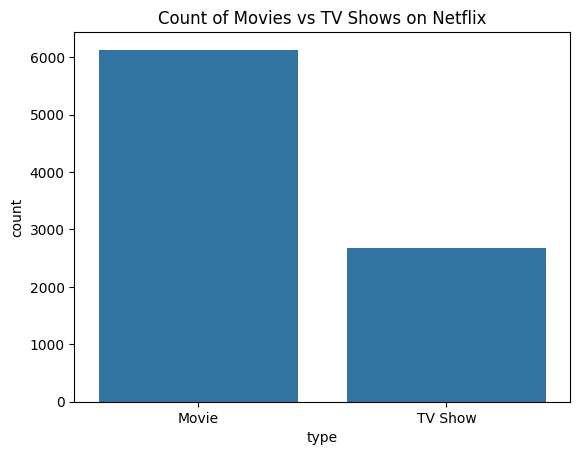

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

In [12]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### Content Growth Over Time

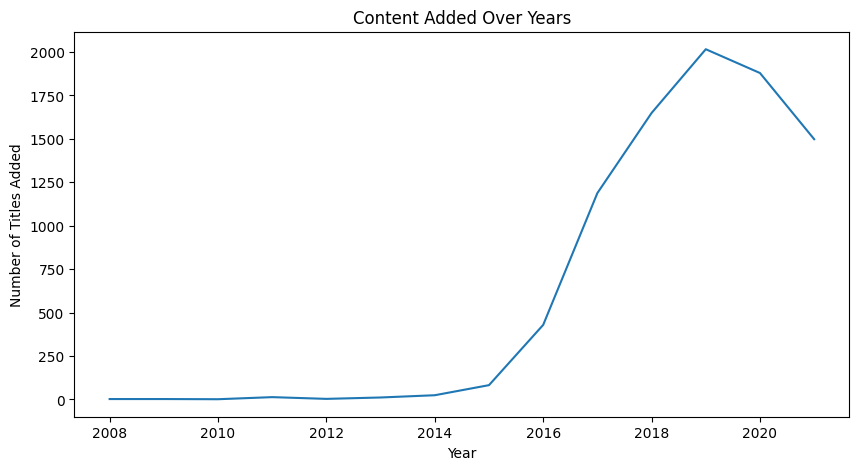

In [13]:
year_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot()
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

### Top 10 Genres

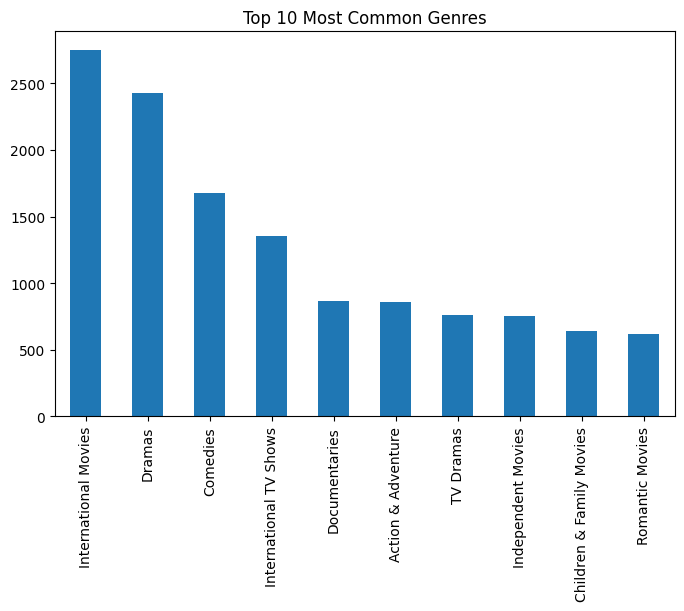

In [14]:
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8,5))
top_genres.plot(kind='bar')
plt.title("Top 10 Most Common Genres")
plt.show()

### Runtime Distribution (Movies Only)

In [15]:
movies = df[df['type'] == 'Movie'].copy()

In [16]:
# Remove ' min' and strip any spaces
movies['duration'] = movies['duration'].str.replace(' min', '').str.strip()

# Convert to numeric safely (NaN for non-convertible)
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

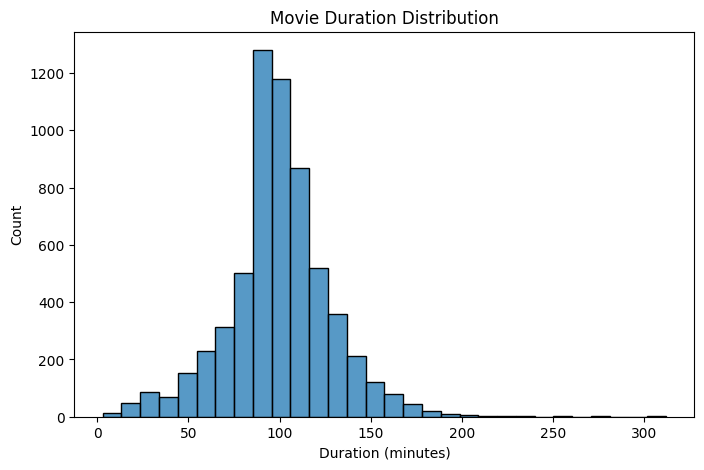

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(movies['duration'].dropna(), bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()